In [1]:
import pyforest
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Create a dictionary with the data
data = {
    'X': [2, 3, 5, 8, 10, 12,  18, 20],
    'Y': [3, 4, 6, 8, 10, 12,  18, 20]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
df

<IPython.core.display.Javascript object>

,X,Y
0,2,3
1,3,4
2,5,6
3,8,8
4,10,10
5,12,12
6,18,18
7,20,20


# Find K Value (No. Of Clusters):

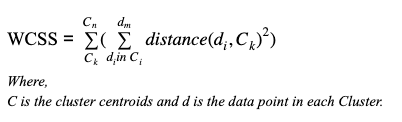

In [ ]:
wcss= []
for k in range(1,7):
    kmeans= KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


In [4]:
WCSS_Values=pd.DataFrame({'K Value': [1,2,3,4,5,6], 'WCSS':wcss})
WCSS_Values

<IPython.core.display.Javascript object>

,K Value,WCSS
0,1,582.375000
1,2,144.166667
2,3,29.333333
3,4,15.500000
4,5,9.000000
5,6,5.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

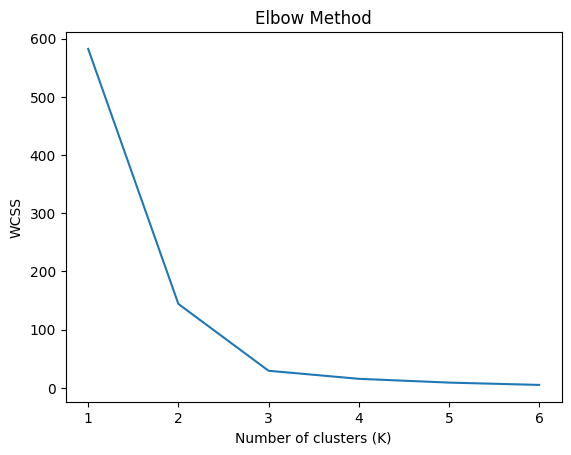

In [5]:
plt.plot(range(1,7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Calculate Centroid and Eucliden Distance for Clustering:

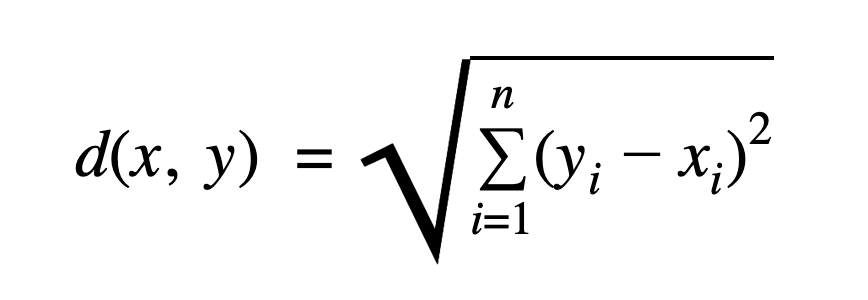

In [6]:
df

,X,Y
0,2,3
1,3,4
2,5,6
3,8,8
4,10,10
5,12,12
6,18,18
7,20,20


In [7]:
# Random Centroids For Initialize: df index 0 and 7
c1= (3,4)
c2= (10,10)


In [8]:
#Euclidean Distance Each Data Point to Each(2) centoids:

# c1 and c2 to all data points euclidean distance:
df['Distance_to_c1']= np.sqrt((df['X']-c1[0])**2+(df['Y']-c1[1])**2)
df['Distance_to_c2'] = np.sqrt((df['X'] - c2[0])**2 + (df['Y'] - c2[1])**2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
df

,X,Y,Distance_to_c1,Distance_to_c2
0,2,3,1.414214,10.630146
1,3,4,0.000000,9.219544
2,5,6,2.828427,6.403124
3,8,8,6.403124,2.828427
4,10,10,9.219544,0.000000
5,12,12,12.041595,2.828427
6,18,18,20.518285,11.313708
7,20,20,23.345235,14.142136


In [10]:
# Assign each data point to the cluster with the minimum distance
df['Cluster'] = np.where(df['Distance_to_c1'] < df['Distance_to_c2'], 'Cluster 1', 'Cluster 2')

<IPython.core.display.Javascript object>

In [11]:
df

,X,Y,Distance_to_c1,Distance_to_c2,Cluster
0,2,3,1.414214,10.630146,Cluster 1
1,3,4,0.000000,9.219544,Cluster 1
2,5,6,2.828427,6.403124,Cluster 1
3,8,8,6.403124,2.828427,Cluster 2
4,10,10,9.219544,0.000000,Cluster 2
5,12,12,12.041595,2.828427,Cluster 2
6,18,18,20.518285,11.313708,Cluster 2
7,20,20,23.345235,14.142136,Cluster 2


# Update Centroids by Calculating Average:

In [12]:
new1_c1 = (df[df['Cluster'] == 'Cluster 1']['X'].mean(), df[df['Cluster'] == 'Cluster 1']['Y'].mean())
new1_c2 = (df[df['Cluster'] == 'Cluster 2']['X'].mean(), df[df['Cluster'] == 'Cluster 2']['Y'].mean())

In [13]:
new1_c1,new1_c2

((3.3333333333333335, 4.333333333333333), (13.6, 13.6))

In [14]:
#Euclidean Distance Each Data Point to Each(2) new_centoids:

# new_c1 and new_c2 to all data points euclidean distance:
df['Distance_to_new1_c1']= np.sqrt((df['X']-new1_c1[0])**2+(df['Y']-new1_c1[1])**2)
df['Distance_to_new1_c2'] = np.sqrt((df['X'] - new1_c2[0])**2 + (df['Y'] - new1_c2[1])**2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
df

,X,Y,Distance_to_c1,Distance_to_c2,Cluster,Distance_to_new1_c1,Distance_to_new1_c2
0,2,3,1.414214,10.630146,Cluster 1,1.885618,15.713688
1,3,4,0.000000,9.219544,Cluster 1,0.471405,14.301049
2,5,6,2.828427,6.403124,Cluster 1,2.357023,11.476933
3,8,8,6.403124,2.828427,Cluster 2,5.934831,7.919596
4,10,10,9.219544,0.000000,Cluster 2,8.749603,5.091169
5,12,12,12.041595,2.828427,Cluster 2,11.571037,2.262742
6,18,18,20.518285,11.313708,Cluster 2,20.047167,6.222540
7,20,20,23.345235,14.142136,Cluster 2,22.874051,9.050967


In [16]:
# Assign each data point to the cluster with the minimum distance
df['new_Cluster'] = np.where(df['Distance_to_new1_c1'] < df['Distance_to_new1_c2'], 'Cluster 1', 'Cluster 2')

<IPython.core.display.Javascript object>

In [17]:
df

,X,Y,Distance_to_c1,Distance_to_c2,Cluster,Distance_to_new1_c1,Distance_to_new1_c2,new_Cluster
0,2,3,1.414214,10.630146,Cluster 1,1.885618,15.713688,Cluster 1
1,3,4,0.000000,9.219544,Cluster 1,0.471405,14.301049,Cluster 1
2,5,6,2.828427,6.403124,Cluster 1,2.357023,11.476933,Cluster 1
3,8,8,6.403124,2.828427,Cluster 2,5.934831,7.919596,Cluster 1
4,10,10,9.219544,0.000000,Cluster 2,8.749603,5.091169,Cluster 2
5,12,12,12.041595,2.828427,Cluster 2,11.571037,2.262742,Cluster 2
6,18,18,20.518285,11.313708,Cluster 2,20.047167,6.222540,Cluster 2
7,20,20,23.345235,14.142136,Cluster 2,22.874051,9.050967,Cluster 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

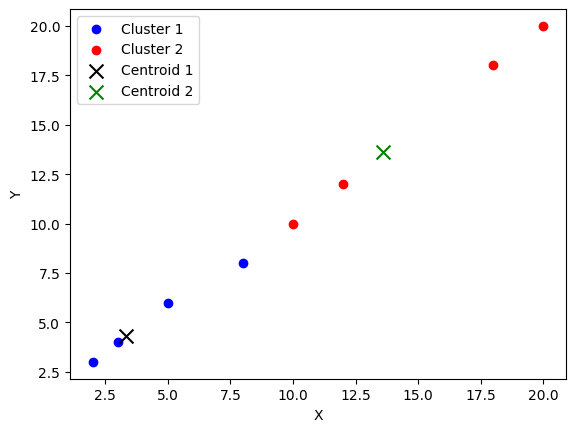

In [18]:
# Create a scatter plot for the data points in each cluster
plt.scatter(df[df['new_Cluster'] == 'Cluster 1']['X'], df[df['new_Cluster'] == 'Cluster 1']['Y'], label='Cluster 1', c='blue')
plt.scatter(df[df['new_Cluster'] == 'Cluster 2']['X'], df[df['new_Cluster'] == 'Cluster 2']['Y'], label='Cluster 2', c='red')

# Plot the centroids as well
plt.scatter(new1_c1[0], new1_c1[1], label='Centroid 1', marker='x', c='black', s=100)
plt.scatter(new1_c2[0], new1_c2[1], label='Centroid 2', marker='x', c='green', s=100)

# Add labels and a legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the scatter plot
plt.show()
